In [27]:
# Plot Rollout Metrics for PPO Training
# ======================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV data
csv_path = "rollout_test_3.csv"  # Update path if needed
df = pd.read_csv(csv_path)

# Check the first few rows to confirm structure
df.head()


,timesteps,learning_rate,entropy_loss,approx_kl,loss,policy_gradient_loss,clip_fraction,value_loss,explained_variance,std,n_updates,clip_range,ep_len_mean,ep_rew_mean
0,128,0.0003,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,0.2,0.000000,0.000000
1,256,0.0003,-2.842357,0.002254,0.319104,-0.005414,0.000000,2.034901,0.001580,1.003548,10,0.2,176.000000,-24.321111
2,384,0.0003,-2.845134,0.006552,0.833628,-0.001611,0.032571,1.439496,0.121850,1.002689,20,0.2,94.750000,-13.158203
3,512,0.0003,-2.836467,0.002642,0.470876,-0.003322,0.000000,1.372185,0.037320,0.995377,30,0.2,94.750000,-13.158203
4,640,0.0003,-2.825033,0.058706,0.132772,-0.007486,0.195952,1.102021,0.015843,0.992709,40,0.2,100.333333,-15.500578


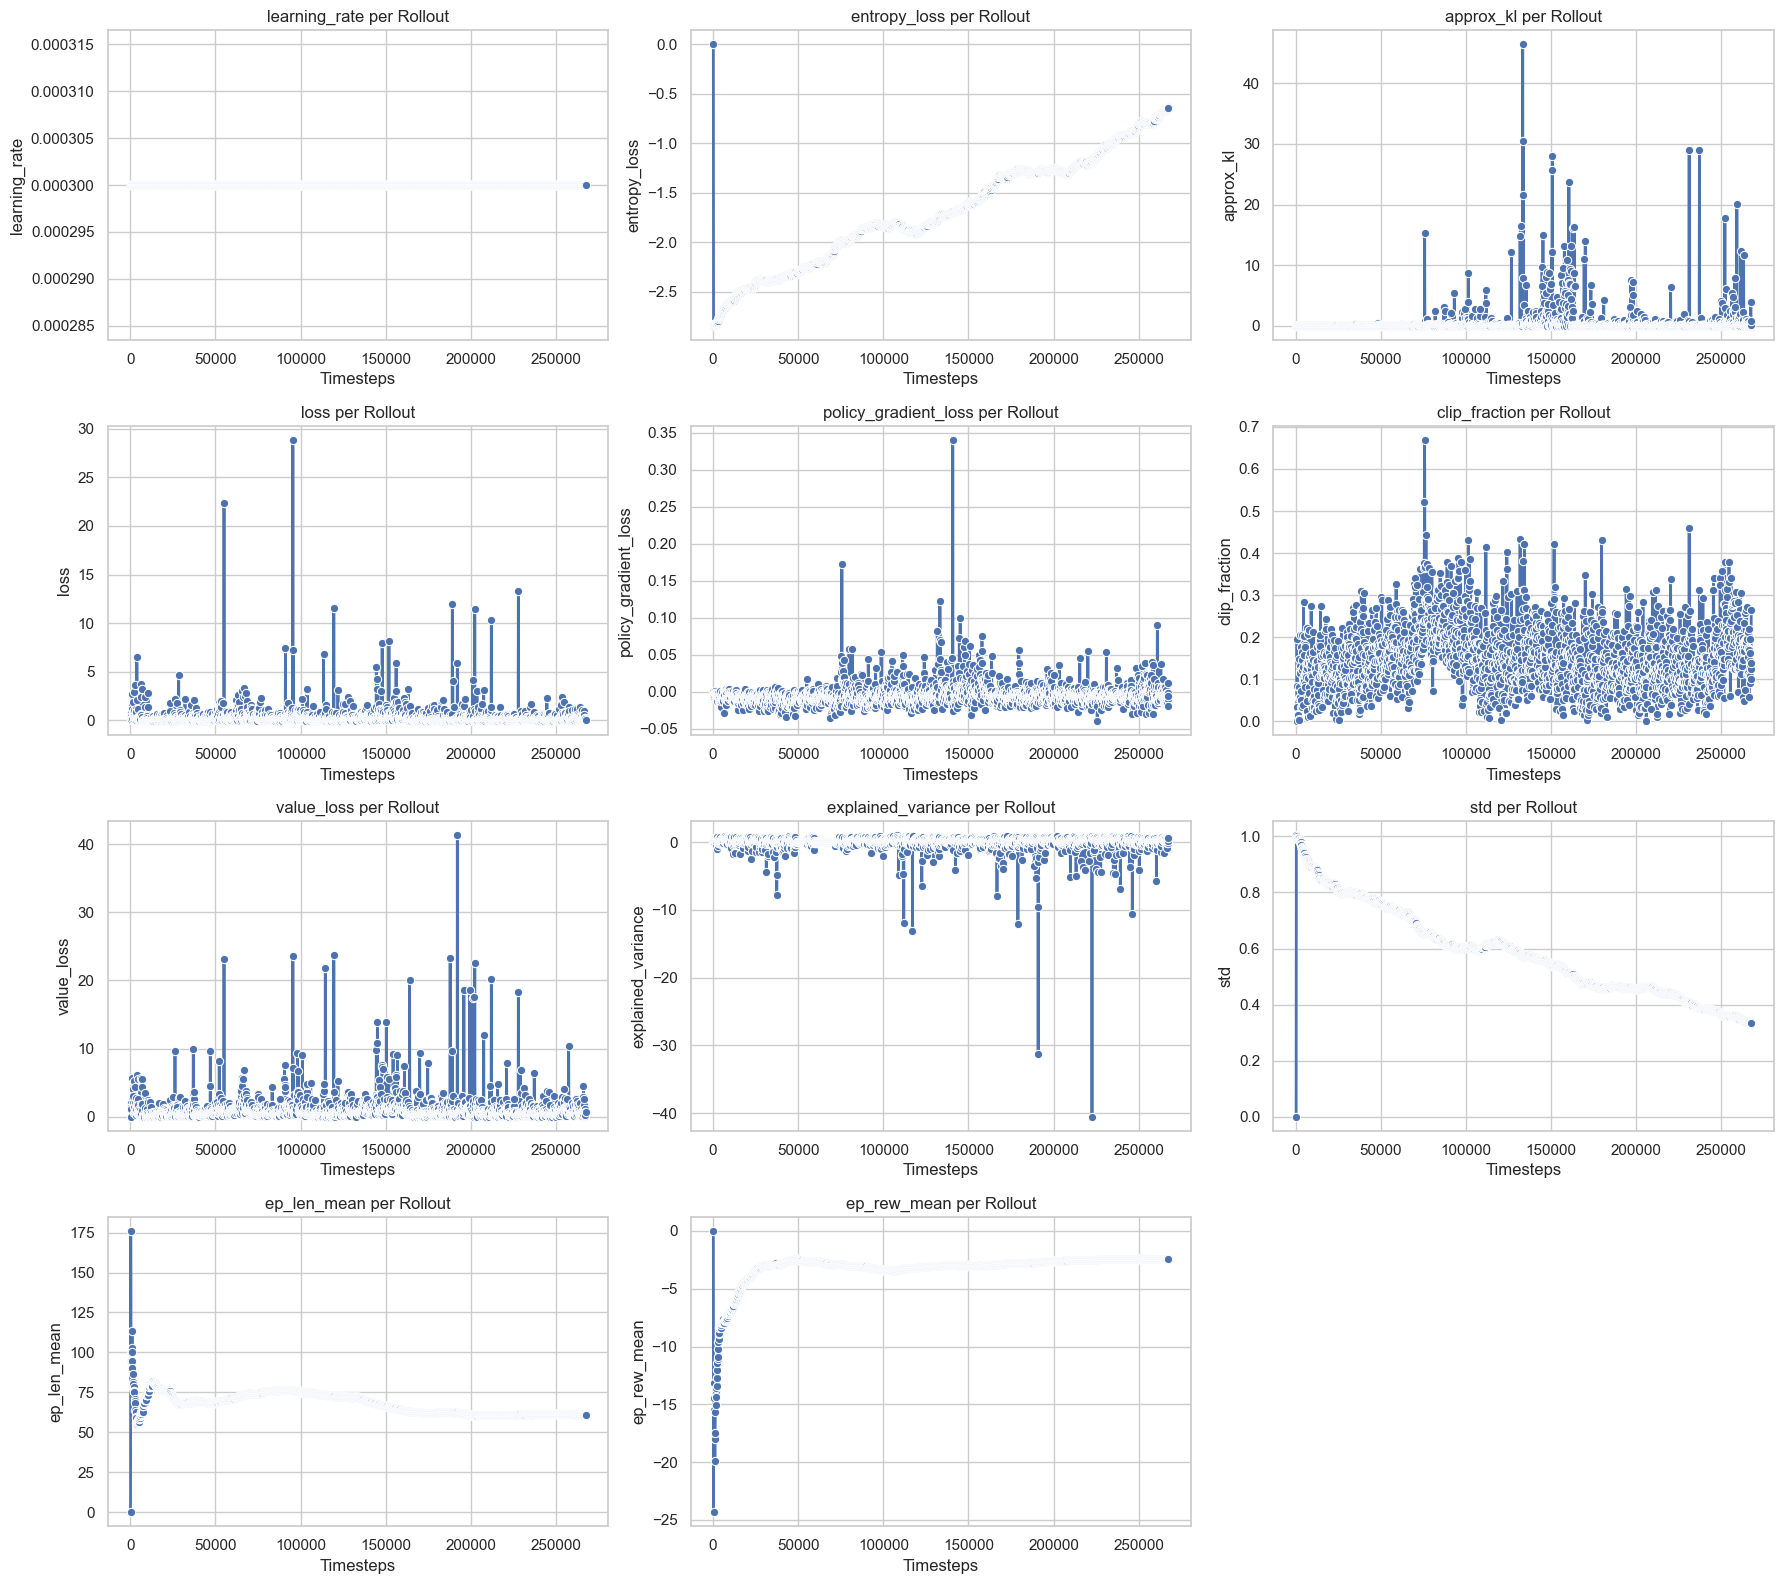

In [28]:
# Set plotting style
sns.set(style="whitegrid", context="notebook")

# Metrics to plot per rollout
metrics = [
    "learning_rate",
    "entropy_loss",
    "approx_kl",
    "loss",
    "policy_gradient_loss",
    "clip_fraction",
    "value_loss",
    "explained_variance",
    "std",
    "ep_len_mean",
    "ep_rew_mean"
]

# Create subplots for each metric
n_cols = 3
n_rows = (len(metrics) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4 * n_rows))
axes = axes.flatten()

# Plot each metric
for idx, metric in enumerate(metrics):
    sns.lineplot(ax=axes[idx], x="timesteps", y=metric, data=df, marker="o", linewidth=2)
    axes[idx].set_title(f"{metric} per Rollout", fontsize=12)
    axes[idx].set_xlabel("Timesteps")
    axes[idx].set_ylabel(metric)
    axes[idx].grid(True)

# Hide any unused subplots
for j in range(len(metrics), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [29]:
# import pandas as pd
# import os
# from pathlib import Path

# # Define o diretório base onde estão as pastas
# base_dir = "experiements/PPO"  # Ajusta se necessário para o teu diretório

# # Lista para armazenar os DataFrames
# dataframes = []
# folder_names = []

# # Procura por todos os ficheiros rollout_test_3.csv em subpastas
# for folder in os.listdir(base_dir):
#     folder_path = os.path.join(base_dir, folder)
    
#     # Verifica se é uma pasta
#     if os.path.isdir(folder_path):
#         csv_file = os.path.join(folder_path, "rollout_test_3.csv")
        
#         # Verifica se o ficheiro existe
#         if os.path.exists(csv_file):
#             print(f"Encontrado: {csv_file}")
            
#             # Lê o CSV
#             df = pd.read_csv(csv_file)
            
#             # Adiciona prefixo ao nome das colunas (exceto se houver uma coluna de índice comum)
#             # Se tiveres uma coluna comum como 'index', 'id', etc., podes preservá-la
#             df_renamed = df.add_prefix(f"{folder}_")
            
#             dataframes.append(df_renamed)
#             folder_names.append(folder)

# print(f"\nEncontrados {len(dataframes)} ficheiros CSV")
# print(f"Pastas: {folder_names}")

# # Junta todos os DataFrames horizontalmente (lado a lado)
# if dataframes:
#     merged_df = pd.concat(dataframes, axis=1)
    
#     print(f"\nDataFrame final tem {merged_df.shape[0]} linhas e {merged_df.shape[1]} colunas")
#     print(f"Colunas: {list(merged_df.columns[:10])}...")  # Mostra as primeiras 10 colunas
    
#     # Guarda o resultado
#     output_file = "merged_rollout_test_3.csv"
#     merged_df.to_csv(output_file, index=False)
#     print(f"\nFicheiro guardado como: {output_file}")
    
#     # Mostra preview do resultado
#     print("\nPreview do ficheiro merged:")
#     print(merged_df.head())
    
# else:
#     print("Nenhum ficheiro CSV encontrado!")


In [30]:
a= {"": True, "s": False}
any( v for k,v in a.items())

True

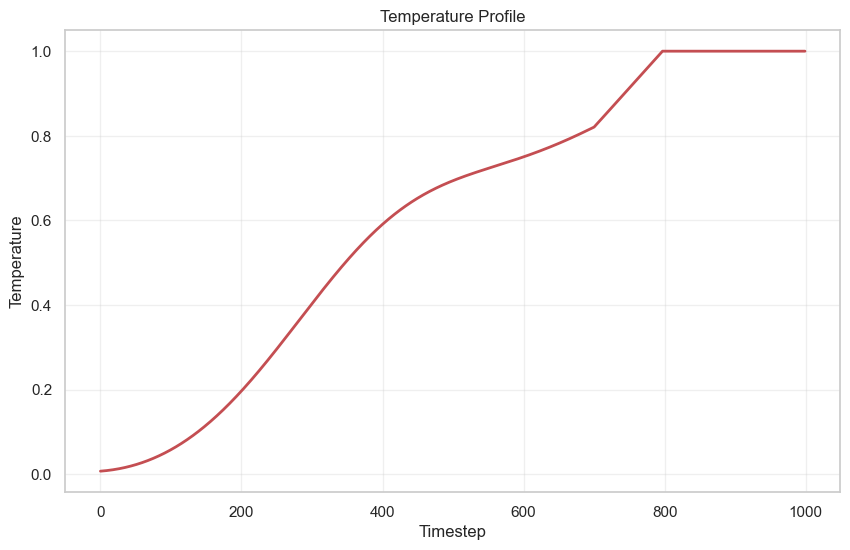

Temperature at timestep 0: 0.007141
Temperature at timestep 500: 0.693951
Temperature at timestep 999: 1.000000
Temperatures at steps [0, 250, 500, 750, 999]: [0.00714138 0.29588235 0.69395119 0.91331266 1.        ]


In [31]:
import numpy as np
import matplotlib.pyplot as plt

def temperature_profile(timestep, num_timesteps=1000, melting_point=0.6, 
                       thermal_conductivity=0.15, fusion_energy=2.5, 
                       cooling_rate=0.008, crystallization_temp=0.3):
    """
    Compute temperature value at given timestep(s) based on melt fusion dynamics.
    
    Args:
        timestep: Single timestep or array of timesteps
        num_timesteps: Total number of timesteps
        melting_point: Critical transition point (0-1 fraction)
        thermal_conductivity: Heat distribution smoothness
        fusion_energy: Energy barrier for phase change
        cooling_rate: Base cooling rate
        crystallization_temp: Structure formation threshold
    
    Returns:
        Temperature value(s) at the given timestep(s)
    """
    # Normalize timestep to 0-1 range and invert (first timestep = last point)
    t_norm = 1 - (np.array(timestep) / num_timesteps)
    
    # Base cosine cooling curve
    base_temp = np.cos((t_norm + cooling_rate) / (1 + cooling_rate) * np.pi / 2) ** 2
    
    # Phase transition plateau around melting point
    melting_influence = np.exp(-((t_norm - melting_point) ** 2) / (2 * thermal_conductivity ** 2))
    fusion_plateau = fusion_energy * melting_influence
    
    # Crystallization enhancement at low temperatures
    crystallization_boost = np.where(
        t_norm > crystallization_temp,
        0,
        (1 - t_norm / crystallization_temp) * 0.3
    )
    
    temperature = base_temp + fusion_plateau * 0.1 + crystallization_boost
    return np.clip(temperature, 0, 1)

# Example usage and visualization
if __name__ == "__main__":
    # Generate temperature profile for all timesteps
    timesteps = np.arange(1000)
    temps = temperature_profile(timesteps)
    
    # Plot the temperature profile
    plt.figure(figsize=(10, 6))
    plt.plot(timesteps, temps, 'r-', linewidth=2)
    plt.title('Temperature Profile')
    plt.xlabel('Timestep')
    plt.ylabel('Temperature')
    plt.grid(True, alpha=0.3)
    plt.show()
    
    # Test individual values
    print(f"Temperature at timestep 0: {temperature_profile(0):.6f}")
    print(f"Temperature at timestep 500: {temperature_profile(500):.6f}")
    print(f"Temperature at timestep 999: {temperature_profile(999):.6f}")
    
    # Test array input
    test_steps = [0, 250, 500, 750, 999]
    test_temps = temperature_profile(test_steps)
    print(f"Temperatures at steps {test_steps}: {test_temps}")